In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
path = r'C:\Users\Gev\Desktop\Data science\house-prices-advanced-regression-techniques\files\train.csv'

In [3]:
frame = pd.read_csv(path, index_col = 0)

In [4]:
df = frame.iloc[:, 20: 40]

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 20 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   RoofStyle     1460 non-null   object 
 1   RoofMatl      1460 non-null   object 
 2   Exterior1st   1460 non-null   object 
 3   Exterior2nd   1460 non-null   object 
 4   MasVnrType    1452 non-null   object 
 5   MasVnrArea    1452 non-null   float64
 6   ExterQual     1460 non-null   object 
 7   ExterCond     1460 non-null   object 
 8   Foundation    1460 non-null   object 
 9   BsmtQual      1423 non-null   object 
 10  BsmtCond      1423 non-null   object 
 11  BsmtExposure  1422 non-null   object 
 12  BsmtFinType1  1423 non-null   object 
 13  BsmtFinSF1    1460 non-null   int64  
 14  BsmtFinType2  1422 non-null   object 
 15  BsmtFinSF2    1460 non-null   int64  
 16  BsmtUnfSF     1460 non-null   int64  
 17  TotalBsmtSF   1460 non-null   int64  
 18  Heating       1460 non-null 

In [6]:
# Handling missing values

In [7]:
df['MasVnrType'].value_counts()

None       864
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64

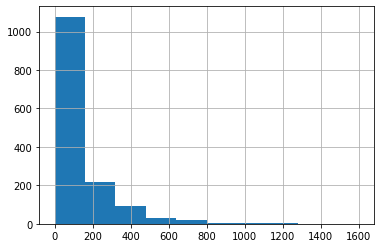

In [8]:
df['MasVnrArea'].hist()
plt.show()

In [9]:
df['MasVnrType'] = df['MasVnrType'].fillna('None')
df['MasVnrArea'] = df['MasVnrArea'].fillna(df['MasVnrArea'].mean())

In [10]:
df.drop(list(df[df['BsmtQual'].isnull()].index), inplace = True)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1423 entries, 1 to 1460
Data columns (total 20 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   RoofStyle     1423 non-null   object 
 1   RoofMatl      1423 non-null   object 
 2   Exterior1st   1423 non-null   object 
 3   Exterior2nd   1423 non-null   object 
 4   MasVnrType    1423 non-null   object 
 5   MasVnrArea    1423 non-null   float64
 6   ExterQual     1423 non-null   object 
 7   ExterCond     1423 non-null   object 
 8   Foundation    1423 non-null   object 
 9   BsmtQual      1423 non-null   object 
 10  BsmtCond      1423 non-null   object 
 11  BsmtExposure  1422 non-null   object 
 12  BsmtFinType1  1423 non-null   object 
 13  BsmtFinSF1    1423 non-null   int64  
 14  BsmtFinType2  1422 non-null   object 
 15  BsmtFinSF2    1423 non-null   int64  
 16  BsmtUnfSF     1423 non-null   int64  
 17  TotalBsmtSF   1423 non-null   int64  
 18  Heating       1423 non-null 

In [12]:
df[df['BsmtExposure'].isnull()]

,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC
Id,,,,,,,,,,,,,,,,,,,,
949,Gable,CompShg,VinylSd,VinylSd,BrkFace,144.0,Gd,TA,PConc,Gd,TA,NaN,Unf,0,Unf,0,936,936,GasA,Ex


In [13]:
df.drop(index = 949 , inplace = True)

In [14]:
df[df['BsmtFinType2'].isnull()]

,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC
Id,,,,,,,,,,,,,,,,,,,,
333,Gable,CompShg,VinylSd,VinylSd,BrkFace,296.0,Gd,TA,PConc,Gd,TA,No,GLQ,1124,NaN,479,1603,3206,GasA,Ex


In [15]:
df.drop(index = 333 , inplace = True)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1421 entries, 1 to 1460
Data columns (total 20 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   RoofStyle     1421 non-null   object 
 1   RoofMatl      1421 non-null   object 
 2   Exterior1st   1421 non-null   object 
 3   Exterior2nd   1421 non-null   object 
 4   MasVnrType    1421 non-null   object 
 5   MasVnrArea    1421 non-null   float64
 6   ExterQual     1421 non-null   object 
 7   ExterCond     1421 non-null   object 
 8   Foundation    1421 non-null   object 
 9   BsmtQual      1421 non-null   object 
 10  BsmtCond      1421 non-null   object 
 11  BsmtExposure  1421 non-null   object 
 12  BsmtFinType1  1421 non-null   object 
 13  BsmtFinSF1    1421 non-null   int64  
 14  BsmtFinType2  1421 non-null   object 
 15  BsmtFinSF2    1421 non-null   int64  
 16  BsmtUnfSF     1421 non-null   int64  
 17  TotalBsmtSF   1421 non-null   int64  
 18  Heating       1421 non-null 

In [17]:
sns.set_style('whitegrid')

In [18]:
df.iloc[:, :5] = df.iloc[:, :5].astype('category')

In [19]:
df['BsmtFinSF1'].describe()

count    1421.000000
mean      455.024631
std       456.087980
min         0.000000
25%         0.000000
50%       400.000000
75%       724.000000
max      5644.000000
Name: BsmtFinSF1, dtype: float64

In [20]:
df.iloc[:, 6:13] = df.iloc[:, 6:13].astype('category')

In [21]:
df['BsmtFinType2'] = df['BsmtFinType2'].astype('category')

In [22]:
df.iloc[:, -2:] = df.iloc[:, -2:].astype('category')

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1421 entries, 1 to 1460
Data columns (total 20 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   RoofStyle     1421 non-null   category
 1   RoofMatl      1421 non-null   category
 2   Exterior1st   1421 non-null   category
 3   Exterior2nd   1421 non-null   category
 4   MasVnrType    1421 non-null   category
 5   MasVnrArea    1421 non-null   float64 
 6   ExterQual     1421 non-null   category
 7   ExterCond     1421 non-null   category
 8   Foundation    1421 non-null   category
 9   BsmtQual      1421 non-null   category
 10  BsmtCond      1421 non-null   category
 11  BsmtExposure  1421 non-null   category
 12  BsmtFinType1  1421 non-null   category
 13  BsmtFinSF1    1421 non-null   int64   
 14  BsmtFinType2  1421 non-null   category
 15  BsmtFinSF2    1421 non-null   int64   
 16  BsmtUnfSF     1421 non-null   int64   
 17  TotalBsmtSF   1421 non-null   int64   
 18  Heating 

In [24]:
cat_col = list(df.columns)

In [25]:
cat_col.remove('BsmtFinSF1')
cat_col.remove('BsmtFinSF2')

In [26]:
cat_col.remove('TotalBsmtSF')
cat_col.remove('BsmtUnfSF')
cat_col.remove('MasVnrArea')

In [27]:
cat_col

['RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC']

In [28]:
for col in cat_col:
    
    categories = (list(df[col].cat.categories)) # All values of column
    number_of_categories = len(categories)
    replace_list = list(range(number_of_categories)) # Number equivalents of categories
    replace_dict = {}
    
    for i in range(number_of_categories): # Making replace dict
        replace_dict[categories[i]] = replace_list[i]
    
    df[col] = df[col].replace(replace_dict)

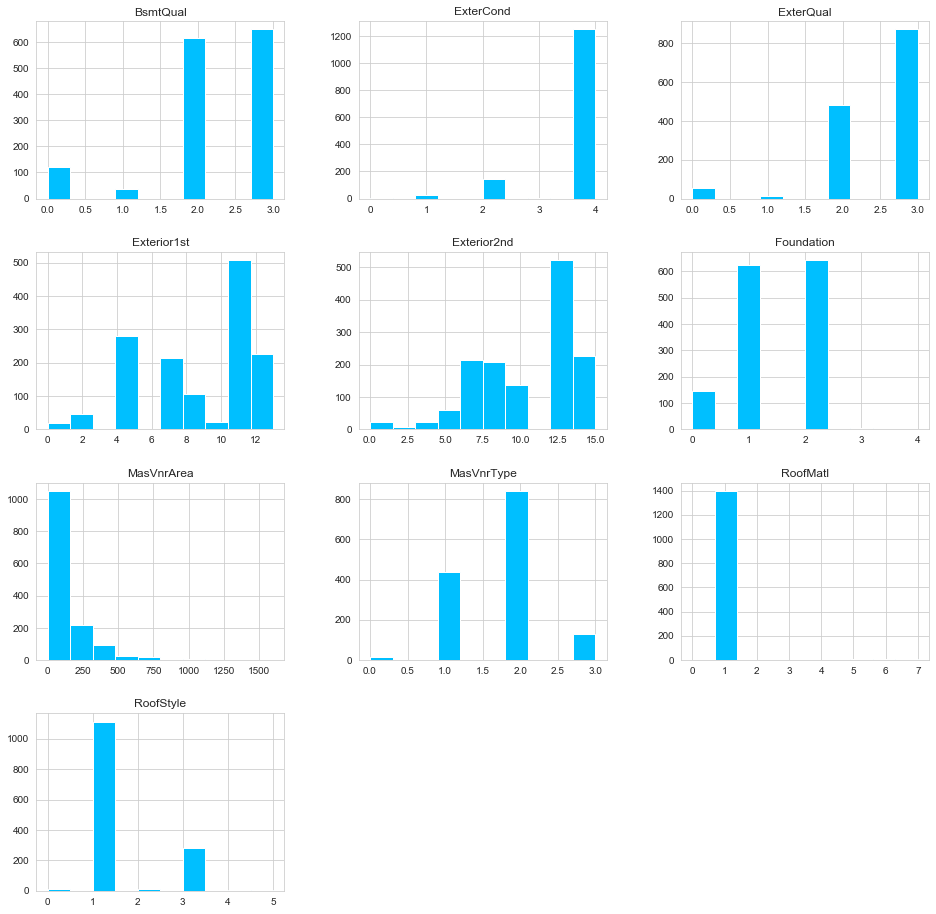

In [29]:
df.iloc[:, :10].hist(color = 'deepskyblue', figsize = (16,16))
plt.show()

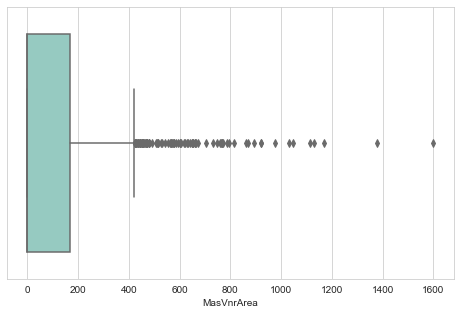

In [30]:
plt.figure(figsize = (8,5))

sns.boxplot(data = df, x = 'MasVnrArea', palette = 'Set3')
plt.show()

In [31]:
df.loc[df['MasVnrArea'] > 1000, 'MasVnrArea'] = df['MasVnrArea'] - 200

In [32]:
df.loc[df['MasVnrArea'] > 1000, 'MasVnrArea'] = df['MasVnrArea'] - 400

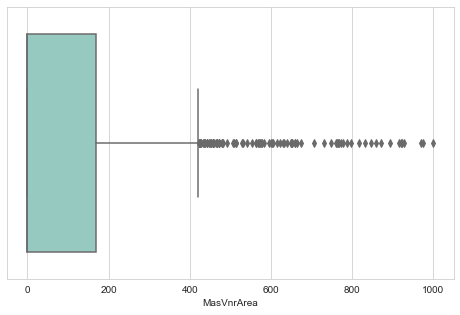

In [33]:
plt.figure(figsize = (8,5))

sns.boxplot(data = df, x = 'MasVnrArea', palette = 'Set3')
plt.show()

In [34]:
df.loc[df['MasVnrArea'] > 800, 'MasVnrArea'] = df['MasVnrArea'] - 200

In [35]:
pd.DataFrame(df['MasVnrArea'].describe())

,MasVnrArea
count,1421.000000
mean,101.905336
std,165.487504
min,0.000000
25%,0.000000
50%,0.000000
75%,168.000000
max,800.000000


In [36]:
df_index = list(df.index)
len(df_index)

1421

In [37]:
sale_index = list(frame['SalePrice'].index)
len(sale_index)

1460

In [38]:
drop_index = []

In [39]:
for index in sale_index:
    if index not in df_index:
        drop_index.append(index)
    else:
        continue

In [40]:
price = frame['SalePrice'].drop(index = drop_index)

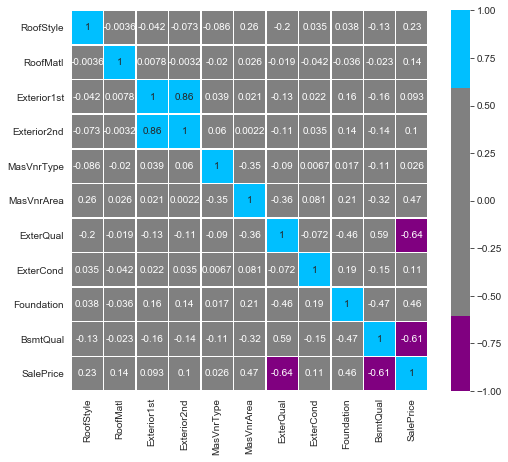

In [41]:
plt.figure(figsize = (8,7))

corr = df.iloc[:, :10].join(price).corr()

cmap = ['purple', 'gray', 'gray', 'gray', 'deepskyblue'] # color map

sns.heatmap(corr, linewidth = .5, annot = True, vmin = -1, vmax = 1, center = 0, cmap = cmap)

plt.show()

In [42]:
# From first 10 - ['MasVnrArea', 'ExterQual', 'Foundation', 'Bsmtqual']

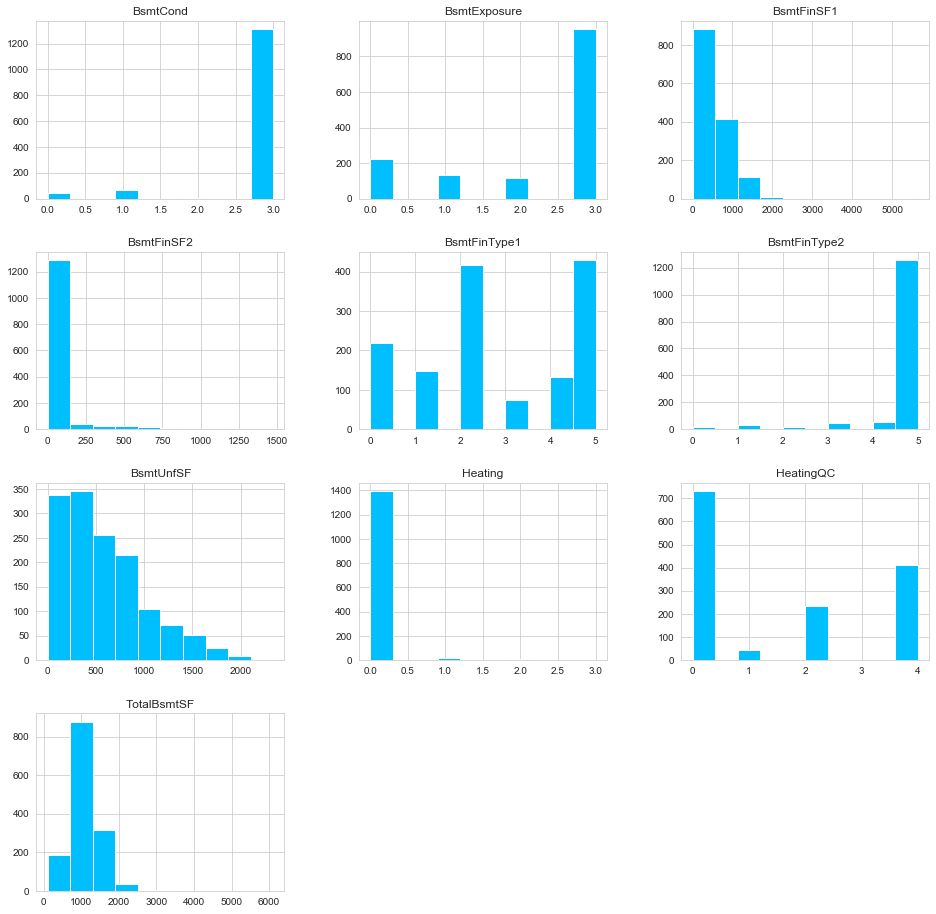

In [43]:
df.iloc[:, 10:].hist(color = 'deepskyblue', figsize = (16,16))
plt.show()

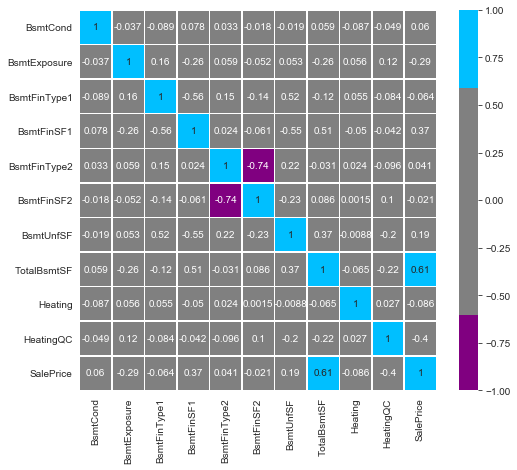

In [44]:
plt.figure(figsize = (8,7))

corr = df.iloc[:, 10:].join(price).corr()

cmap = ['purple', 'gray', 'gray', 'gray', 'deepskyblue'] # color map

sns.heatmap(corr, linewidth = .5, annot = True, vmin = -1, vmax = 1, center = 0, cmap = cmap)

plt.show()

In [45]:
# From second 10 - ['MsmtExposure', 'BsmtFinSF1', 'TotalBsmtSF', 'HeatingQC']

In [46]:
df = df[['MasVnrArea', 'ExterQual', 'Foundation', 'BsmtQual', 'BsmtExposure', 'BsmtFinSF1', 'TotalBsmtSF', 'HeatingQC']]

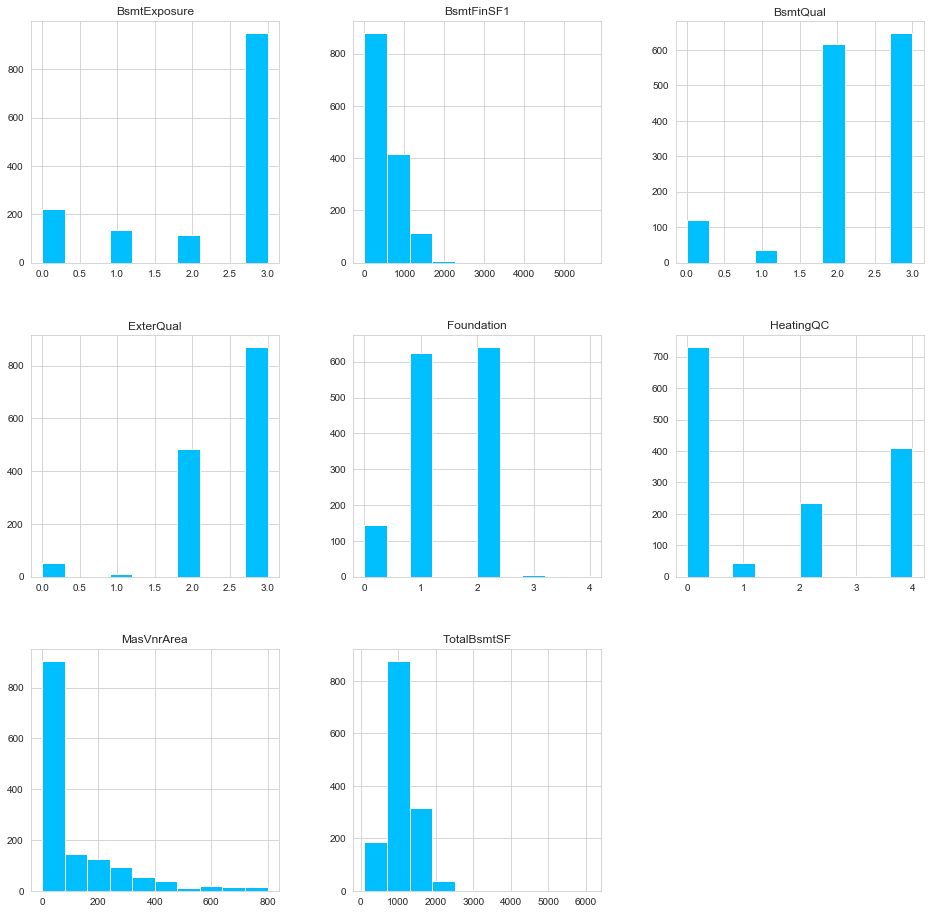

In [47]:
df.hist(color = 'deepskyblue', figsize = (16,16))
plt.show()

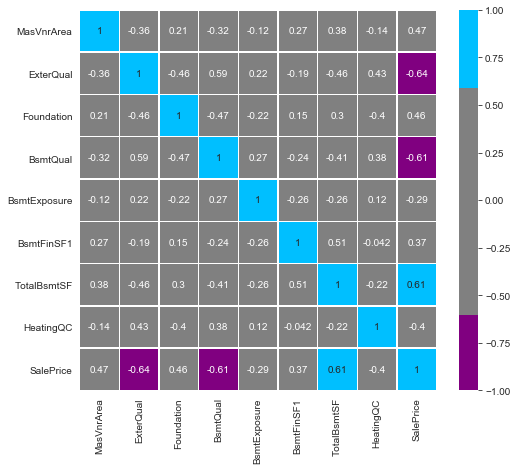

In [48]:
plt.figure(figsize = (8,7))

corr = df.join(price).corr()

cmap = ['purple', 'gray', 'gray', 'gray', 'deepskyblue'] # color map

sns.heatmap(corr, linewidth = .5, annot = True, vmin = -1, vmax = 1, center = 0, cmap = cmap)

plt.show()

In [49]:
#BsmtFinSF1

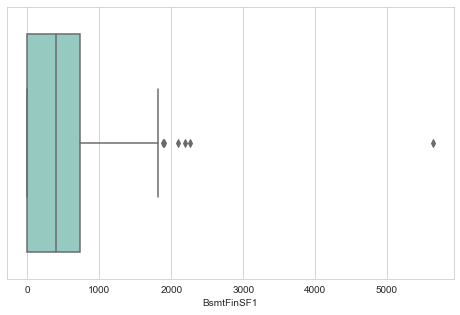

In [50]:
plt.figure(figsize = (8,5))

sns.boxplot(data = df, x = 'BsmtFinSF1', palette = 'Set3')
plt.show()

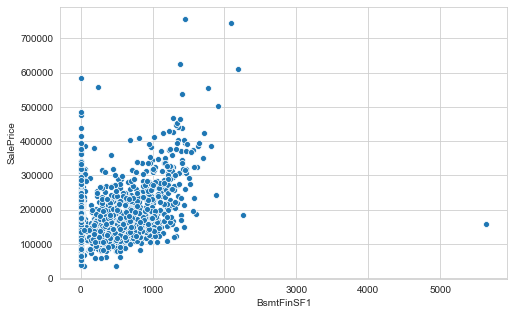

In [51]:
plt.figure(figsize = (8,5))

sns.scatterplot(y = price, x = df['BsmtFinSF1'], palette = 'Set3')
plt.show()

In [52]:
df['BsmtFinSF1'].sort_values(ascending  = False).iloc[:7]

Id
1299    5644
524     2260
899     2188
1183    2096
179     1904
71      1880
54      1810
Name: BsmtFinSF1, dtype: int64

In [53]:
# max value = 1.5 * (IQR) = 1.5 * (724-0) = 1.5* 724 = 

In [54]:
df.loc[df['BsmtFinSF1'] > 3000, 'BsmtFinSF1'] = 1880

In [55]:
df.loc[df['BsmtFinSF1'] > 2000, 'BsmtFinSF1'] = 300

In [56]:
def graph(col):
    fig, (ax1, ax2) = plt.subplots(1,2, figsize = (16, 4 ))
    
    ax1 = sns.boxplot(x = col, palette = 'Set3', ax = ax1)
    ax1.set_title('Boxplot {}'.format(col.name), fontsize = 13)
    
    ax2 = sns.scatterplot(y = price, x = col, color = 'forestgreen', ax = ax2)
    ax2.set_title('Scatterplot {}'.format(col.name), fontsize = 13)
    
    
    plt.show()

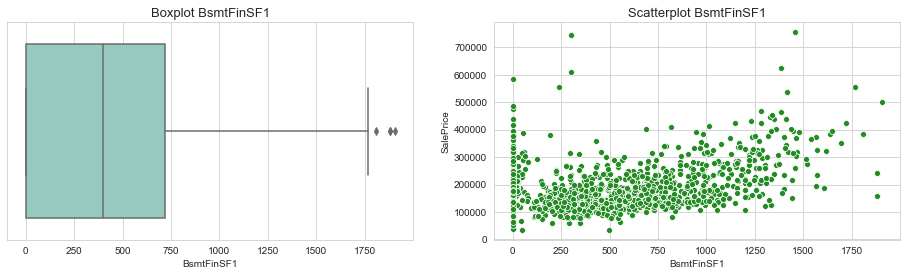

In [57]:
graph(df['BsmtFinSF1'])

In [58]:
test = pd.DataFrame(df['BsmtFinSF1'].copy())

In [59]:
test.loc[test['BsmtFinSF1'] > 1750, 'BsmtFinSF1'] = test['BsmtFinSF1'] - 250

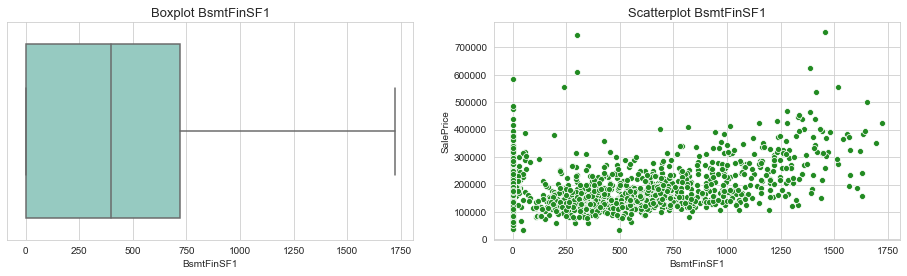

In [60]:
graph(test['BsmtFinSF1'])

In [61]:
del test

In [62]:
df.loc[df['BsmtFinSF1'] > 1750, 'BsmtFinSF1'] = df['BsmtFinSF1'] - 250

In [63]:
#BsmtQual

In [64]:
df['BsmtQual'].value_counts()

3    649
2    616
0    121
1     35
Name: BsmtQual, dtype: int64

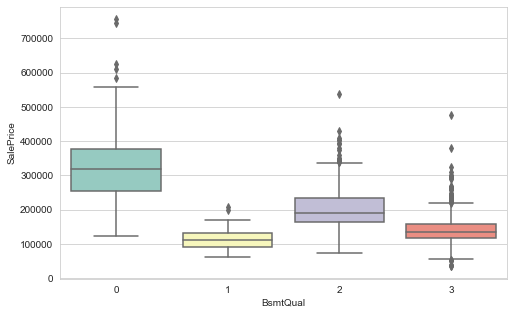

In [65]:
plt.figure(figsize = (8,5))

sns.boxplot(x = df['BsmtQual'], y = price, palette = 'Set3')
plt.show()

In [66]:
test = pd.DataFrame(df['BsmtQual'].copy())

In [67]:
test.loc[test['BsmtQual'] == 1, 'BsmtQual'] = 0

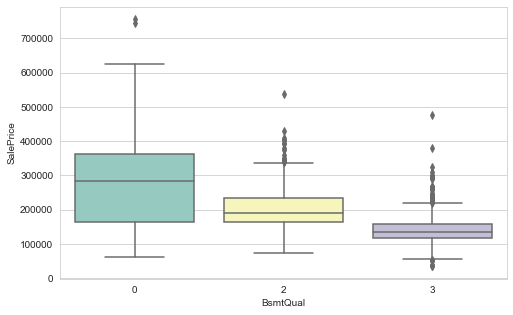

In [68]:
plt.figure(figsize = (8,5))

sns.boxplot(x = test['BsmtQual'], y = price, palette = 'Set3')
plt.show()

In [69]:
test_df = pd.DataFrame(df['BsmtQual']).join(test['BsmtQual'], rsuffix = '_test').join(price)

In [70]:
test_df.corr()

,BsmtQual,BsmtQual_test,SalePrice
BsmtQual,1.000000,0.986364,-0.611274
BsmtQual_test,0.986364,1.000000,-0.556325
SalePrice,-0.611274,-0.556325,1.000000


In [71]:
del test, test_df

#### Test results
As tests show, there is no need to replace 1 with 0

In [72]:
#Fondation

In [73]:
test = pd.DataFrame(df['Foundation'].copy())

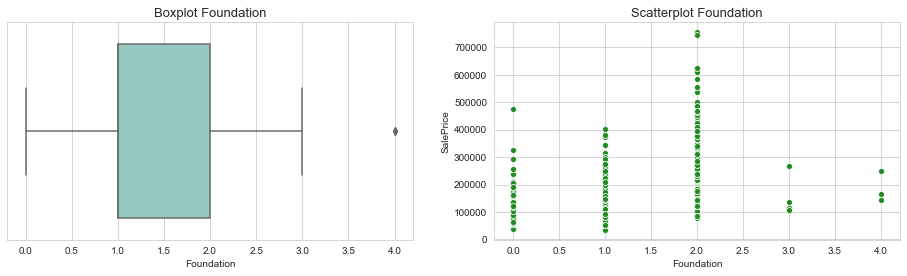

In [74]:
graph(test['Foundation'])

In [75]:
test.loc[test['Foundation'] == 4, 'Foundation'] = 3

In [76]:
test_df = pd.DataFrame(df['Foundation']).join(test['Foundation'], rsuffix = '_test').join(price)

In [77]:
test_df.corr()

,Foundation,Foundation_test,SalePrice
Foundation,1.000000,0.997721,0.455356
Foundation_test,0.997721,1.000000,0.459806
SalePrice,0.455356,0.459806,1.000000


In [78]:
test.loc[test['Foundation'] == 3, 'Foundation'] = 0

In [79]:
test_df = pd.DataFrame(df['Foundation']).join(test['Foundation'], rsuffix = '_test').join(price)

In [80]:
test_df.corr()

,Foundation,Foundation_test,SalePrice
Foundation,1.000000,0.920779,0.455356
Foundation_test,0.920779,1.000000,0.466400
SalePrice,0.455356,0.466400,1.000000


In [81]:
df['Foundation'] = test['Foundation']

In [82]:
del test, test_df

#### Test results
In this tests, results were positive so I decided to replace original data

In [83]:
# HeatingQC

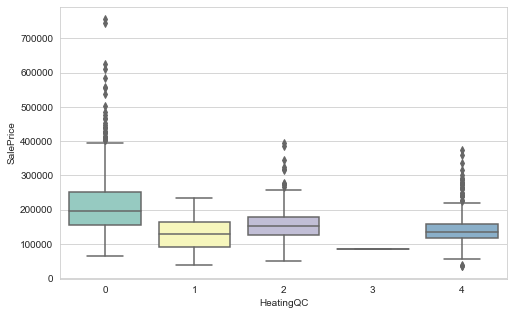

In [84]:
plt.figure(figsize = (8,5))

sns.boxplot(x = df['HeatingQC'], y = price, palette = 'Set3')
plt.show()

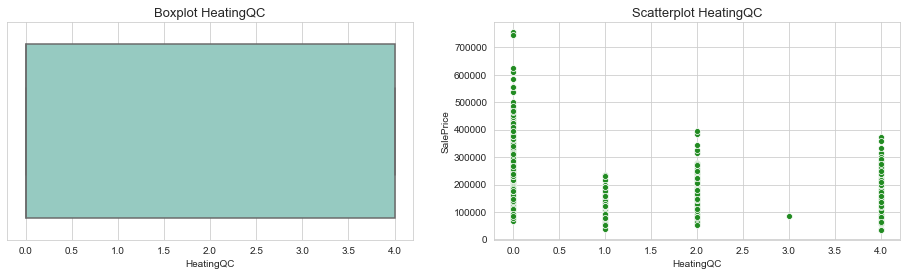

In [85]:
graph(df['HeatingQC'])

In [86]:
df.loc[df['HeatingQC'] == 3, 'HeatingQC'] = 1

In [87]:
#MasVnrArea

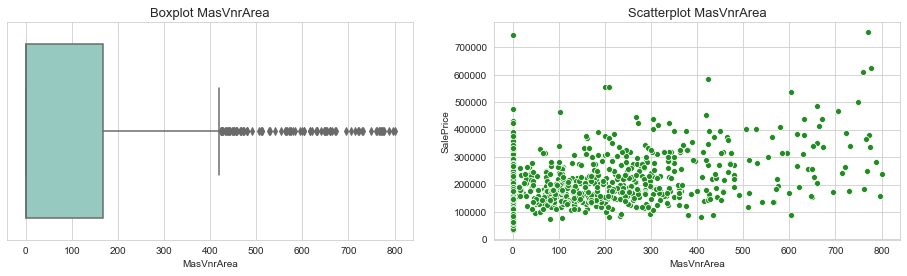

In [88]:
graph(df['MasVnrArea'])

### Hpothesis testing
Hpothesis - 'Droping  values will help model'

In [89]:
test = df['MasVnrArea'].copy()

In [90]:
df_test = pd.DataFrame(test).join(price)

In [91]:
df_test = df_test.loc[df_test['MasVnrArea'] != 0]

In [92]:
df_test.corr()

,MasVnrArea,SalePrice
MasVnrArea,1.000000,0.422063
SalePrice,0.422063,1.000000


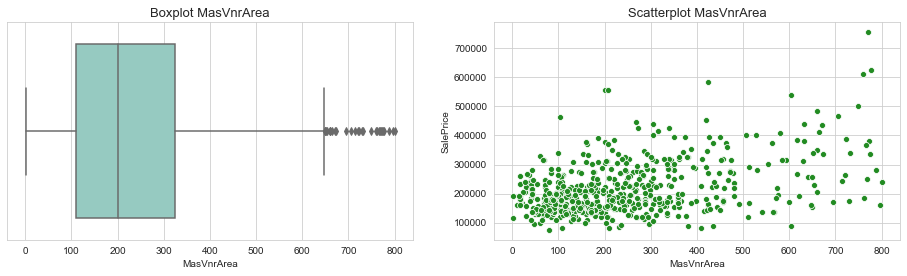

In [93]:
graph(df_test['MasVnrArea'])

In [94]:
#Model testing

In [95]:
from sklearn import linear_model, model_selection, metrics

In [96]:
reg = linear_model.Ridge()

In [97]:
print(model_selection.cross_val_score(reg, X = np.array(df['MasVnrArea']).reshape(-1,1), y = price, cv = 10, 
                                      scoring = 'neg_mean_squared_log_error').mean())

-0.12949148027695223


In [98]:
print(model_selection.cross_val_score(reg, X = np.array(df_test['MasVnrArea']).reshape(-1,1), y = df_test['SalePrice'], 
                                      cv = 10, scoring = 'neg_mean_squared_log_error').mean())

-0.12288151051450691


In [99]:
del test, df_test, reg

### Summary
#### Summarizing this a bit difficult cus there is no significant changes, so I'll keep 0's

In [100]:
#TotalBsmtSF

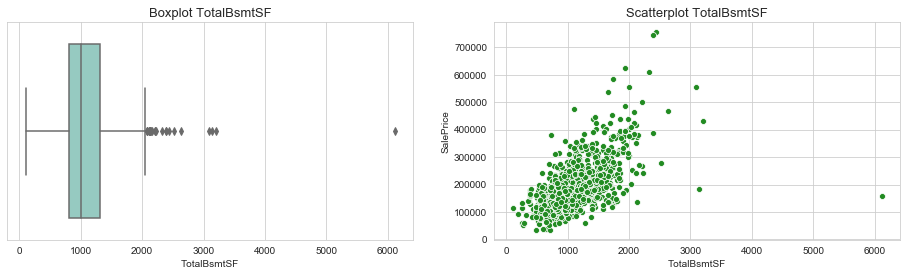

In [101]:
graph(df['TotalBsmtSF'])

In [102]:
df['TotalBsmtSF'].sort_values(ascending = False).iloc[:5]

Id
1299    6110
497     3200
524     3138
441     3094
1374    2633
Name: TotalBsmtSF, dtype: int64

In [103]:
df.loc[df['TotalBsmtSF'] > 3000, 'TotalBsmtSF'] = 2650

In [104]:
df.loc[df['TotalBsmtSF'] > 2650, 'TotalBsmtSF'] = 2650

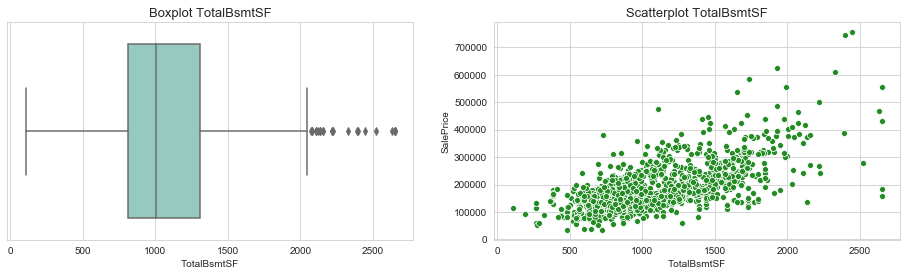

In [105]:
graph(df['TotalBsmtSF'])

### Final Results

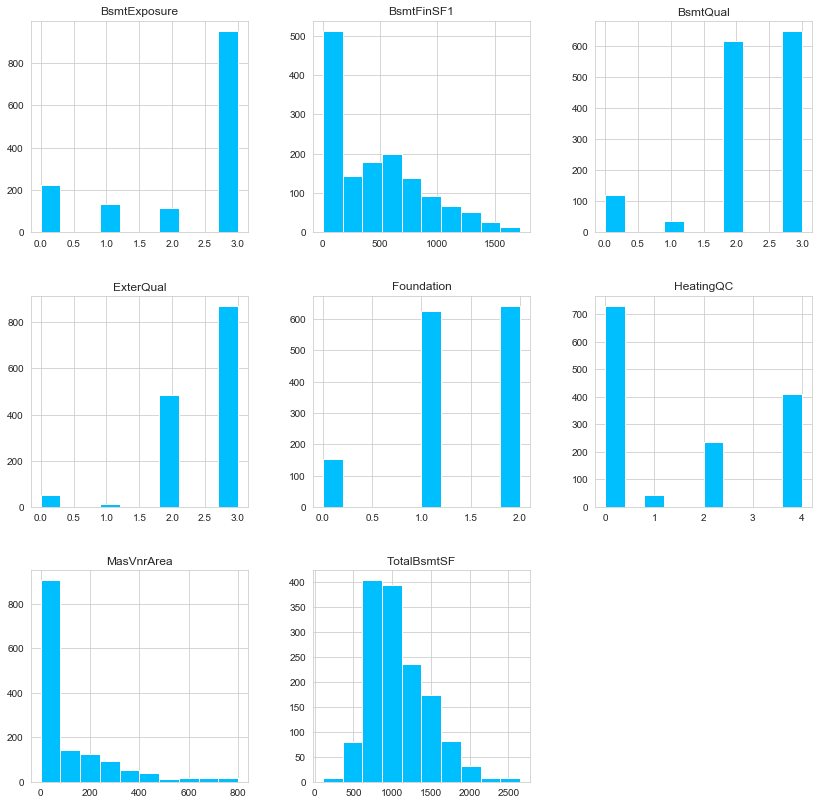

In [106]:
df.hist(color = 'deepskyblue', figsize = (14,14))
plt.show()

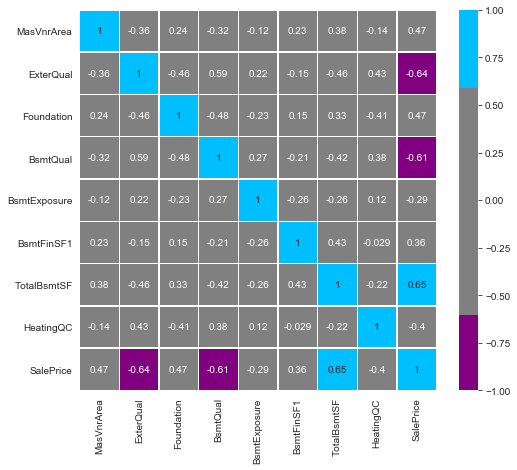

In [107]:
plt.figure(figsize = (8,7))

corr = df.join(price).corr()

cmap = ['purple', 'gray', 'gray', 'gray', 'deepskyblue'] # color map

sns.heatmap(corr, linewidth = .5, annot = True, vmin = -1, vmax = 1, center = 0, cmap = cmap)

plt.show()

### Model selecting

In [108]:
from sklearn import ensemble

In [109]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1421 entries, 1 to 1460
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MasVnrArea    1421 non-null   float64
 1   ExterQual     1421 non-null   int64  
 2   Foundation    1421 non-null   int64  
 3   BsmtQual      1421 non-null   int64  
 4   BsmtExposure  1421 non-null   int64  
 5   BsmtFinSF1    1421 non-null   int64  
 6   TotalBsmtSF   1421 non-null   int64  
 7   HeatingQC     1421 non-null   int64  
dtypes: float64(1), int64(7)
memory usage: 139.9 KB


In [110]:
reg = linear_model.Ridge()

In [111]:
forest = ensemble.RandomForestRegressor()

In [112]:
model_data = df[['MasVnrArea', 'BsmtFinSF1', 'TotalBsmtSF']]

In [113]:
print('Linear Regression with num features:')
print(model_selection.cross_val_score(reg, X = model_data, y = price, cv = 5, scoring = 'neg_mean_squared_log_error'))

Linear Regression with num features:
[-0.08452699 -0.09964438 -0.08433094 -0.0863151  -0.09082734]


In [114]:
print('Random Forest with num features:')
print(model_selection.cross_val_score(forest, X = model_data, y = price, cv = 5, scoring = 'neg_mean_squared_log_error'))

Random Forest with num features:
[-0.09183996 -0.09974189 -0.09644455 -0.08407469 -0.09469269]


In [115]:
for col in ['ExterQual', 'Foundation', 'BsmtExposure', 'HeatingQC']:
    dummies = pd.get_dummies(df[col])
    model_data = model_data.join(dummies, lsuffix = col)

In [116]:
print('Linear Regression with all features:')
print(model_selection.cross_val_score(reg, X = model_data, y = price, cv = 5, scoring = 'neg_mean_squared_log_error'))

Linear Regression with all features:
[-0.04917769 -0.06277738 -0.0529167  -0.05813147 -0.06437803]


In [117]:
print('Random Forest with all features:')
print(model_selection.cross_val_score(forest, X = model_data, y = price, cv = 5, scoring = 'neg_mean_squared_log_error'))

Random Forest with all features:
[-0.05201198 -0.06620955 -0.05614044 -0.06078684 -0.06819803]


In [118]:
model_data.to_csv(r'C:\Users\Gev\Desktop\Data science\house-prices-advanced-regression-techniques\Train_data\part2.csv')